# **Consumo de Energía Eléctrica de los clientes de Electro Ucayali SA**

Realizaremos el analis de los datos abiertos persentados por la entidad Electro Ucayali SA, estos dataset, los descargamos desde la pagina de datos abeirtos de la  Plataforma Nacional de [Datos abiertos](https://www.datosabiertos.gob.pe/dataset/consumo-de-energ%C3%ADa-el%C3%A9ctrica-de-los-clientes-de-electro-ucayali-sa)

Importamos las Librerias necesarios

In [ ]:
import pandas as pd
import numpy as np
import io

Cargamos los Datos, que descargamos para nuestro analisis

In [ ]:
from google.colab import files 
uploaded = files.upload()

almacenamos cada archivo csv en datafraeme despectivos 

In [ ]:
df_nov2022 = pd.read_csv(io.BytesIO(uploaded["Datos_Abiertos - Noviembre 2022.csv"]))
df_dic2022 = pd.read_csv(io.BytesIO(uploaded["Datos_Abiertos - Diciembre 2022.csv"]))
df_oct2022 = pd.read_csv(io.BytesIO(uploaded["Datos_Abiertos - Octubre 2022.csv"]))
df_ene2023 = pd.read_csv(io.BytesIO(uploaded["Datos_Abiertos - Enero 2023_0.csv"]))
df_feb2023 = pd.read_csv(io.BytesIO(uploaded["Datos_Abiertos - Febrero 2023.csv"]))

Revisamos las columnas de cadadataframe, con el fin de revisar similitudes o diferencias

In [ ]:
print("\x1b[1;33m"+"OCT 2022 : ", df_oct2022.columns)
print("\033[4;35m"+"nov 2022 : ", df_nov2022.columns)
print("\033[1;33m"+"dic 2022 : ", df_dic2022.columns)
print("\033[;36m"+"ene 2023 : ", df_ene2023.columns)
print("\x1b[1;33m"+"feb 2023 : ", df_ene2023.columns)

OCT 2022 :  Index(['TITULAR', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'FECHA_ALTA', 'TARIFA', 'PERIODO', 'CONSUMO_KWh', 'FACTURACION',
       'STATUS_CLIENTE', 'FECHA_CORTE'],
      dtype='object')
nov 2022 :  Index(['TITULAR', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'FECHA_ALTA', 'TARIFA', 'PERIODO', 'CONSUMO_KWh', 'FACTURACION',
       'STATUS_CLIENTE', 'FECHA_CORTE'],
      dtype='object')
dic 2022 :  Index(['TITULAR', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'FECHA_ALTA', 'TARIFA', 'PERIODO', 'CONSUMO_KWh', 'FACTURACION',
       'STATUS_CLIENTE', 'FECHA_CORTE'],
      dtype='object')
ene 2023 :  Index(['TITULAR', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'FECHA_ALTA', 'TARIFA', 'PERIODO', 'CONSUMO_KWh', 'FACTURACION',
       'STATUS_CLIENTE', 'FECHA_CORTE'],
      dtype='object')
feb 2023 :  Index(['TITULAR', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'FECHA_ALTA', 'TARIFA', 'PERIODO', 'CONSUMO_KWh'

Observamos que en el dataframe df_ene2023, existe diferencia en el nombre de la columna CONSUMO_KWATTS y CONSUMO_KWh de las demas columnas

Para esto realizamos un renombre de la columna a fin de uniformizar y poder unir los dataset en un solo DataFrame

In [ ]:
df_feb2023.rename({'CONSUMO_KWATTS':'CONSUMO_KWh'}, axis=1,inplace=True)
df_feb2023.columns

Index(['TITULAR', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO',
       'FECHA_ALTA', 'TARIFA', 'PERIODO', 'CONSUMO_KWh', 'FACTURACION',
       'STATUS_CLIENTE', 'FECHA_CORTE'],
      dtype='object')

In [ ]:
df_feb2023.head()

,TITULAR,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO,FECHA_ALTA,TARIFA,PERIODO,CONSUMO_KWh,FACTURACION,STATUS_CLIENTE,FECHA_CORTE
0,10001,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,20001209,BT5B,202302,0.0,122.0,NORMAL,2023309
1,10002,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,20110728,BT5B,202302,76.0,53.5,NORMAL,2023309
2,10003,UCAYALI,CORONEL PORTILLO,YARINACOCHA,250105,20110728,BT5B,202302,28.0,12.5,NORMAL,2023309
3,10004,UCAYALI,PADRE ABAD,PADRE ABAD,250301,20170128,BT5B,202302,1.0,0.0,NORMAL,2023309
4,10005,UCAYALI,PADRE ABAD,IRAZOLA,250302,20170301,BT5B,202302,25.0,3.0,NORMAL,2023309


In [ ]:
# Validamos los datos nulos en nuestro dataframe
df_ene2023.isnull().sum()

TITULAR           0
DEPARTAMENTO      0
PROVINCIA         0
DISTRITO          0
UBIGEO            0
FECHA_ALTA        0
TARIFA            0
PERIODO           0
CONSUMO_KWh       0
FACTURACION       0
STATUS_CLIENTE    0
FECHA_CORTE       0
dtype: int64

Realizamos la union de todos los datasets, en uno nuevo, validando el orden e index y ralizamos una consulta de la cantidad de registros obtenidos con .shape

In [ ]:
dataframes = [df_nov2022, df_dic2022, df_oct2022, df_ene2023,df_feb2023]
df_ucayali = pd.concat(dataframes, sort='False', ignore_index='True')
df_ucayali.shape

<ipython-input-20-cad6f3442755>:2: FutureWarning: Passing non boolean values for sort is deprecated and will error in a future version!
  df_ucayali = pd.concat(dataframes, sort='False', ignore_index='True')


(481940, 12)

Visualizamos nuestro dataframe

In [ ]:
df_ucayali

,CONSUMO_KWh,DEPARTAMENTO,DISTRITO,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,PROVINCIA,STATUS_CLIENTE,TARIFA,TITULAR,UBIGEO
0,130.0,UCAYALI,CALLERIA,110.7,20080222,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10001,250101
1,17.0,UCAYALI,CALLERIA,31.2,20040206,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10002,250101
2,20.0,UCAYALI,IRAZOLA,118.3,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10003,250302
3,23.0,UCAYALI,ALEXANDER VON HUMBOLT,21.7,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10004,250305
4,23.0,UCAYALI,IRAZOLA,41.5,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10005,250302
...,...,...,...,...,...,...,...,...,...,...,...,...
481935,5.0,UCAYALI,CAMPOVERDE,2.2,20140814,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106515,250102
481936,2.0,UCAYALI,CAMPOVERDE,0.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106516,250102
481937,9.0,UCAYALI,CAMPOVERDE,0.0,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106517,250102
481938,62.0,UCAYALI,CAMPOVERDE,192.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106518,250102


In [ ]:
# revisamos los tipos de datos de nuestro dataset
df_ucayali.dtypes

CONSUMO_KWh       float64
DEPARTAMENTO       object
DISTRITO           object
FACTURACION       float64
FECHA_ALTA          int64
FECHA_CORTE         int64
PERIODO             int64
PROVINCIA          object
STATUS_CLIENTE     object
TARIFA             object
TITULAR             int64
UBIGEO              int64
dtype: object

In [ ]:
# revisamos con .info() 
df_ucayali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481940 entries, 0 to 481939
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   CONSUMO_KWh     481940 non-null  float64
 1   DEPARTAMENTO    481940 non-null  object 
 2   DISTRITO        481940 non-null  object 
 3   FACTURACION     481940 non-null  float64
 4   FECHA_ALTA      481940 non-null  int64  
 5   FECHA_CORTE     481940 non-null  int64  
 6   PERIODO         481940 non-null  int64  
 7   PROVINCIA       481940 non-null  object 
 8   STATUS_CLIENTE  481940 non-null  object 
 9   TARIFA          481940 non-null  object 
 10  TITULAR         481940 non-null  int64  
 11  UBIGEO          481940 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 44.1+ MB


In [ ]:
# Anulamos los datos nulos
df_ucayali.isnull().sum()

CONSUMO_KWh       0
DEPARTAMENTO      0
DISTRITO          0
FACTURACION       0
FECHA_ALTA        0
FECHA_CORTE       0
PERIODO           0
PROVINCIA         0
STATUS_CLIENTE    0
TARIFA            0
TITULAR           0
UBIGEO            0
dtype: int64

In [ ]:
# con .describe() visalizamos las medidas referenciales 
df_ucayali.describe()

,CONSUMO_KWh,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,TITULAR,UBIGEO
count,481940.000000,481940.000000,4.819400e+05,4.819400e+05,481940.000000,481940.000000,481940.000000
mean,120.450172,170.302967,2.010213e+07,9.290910e+06,202247.250932,58194.587444,249865.813012
std,240.632799,393.473764,8.380772e+04,8.912797e+06,44.351370,27824.999167,6393.357120
min,0.000000,0.000000,1.900010e+07,2.023109e+06,202210.000000,10001.000000,100903.000000
25%,23.000000,28.600000,2.002110e+07,2.023209e+06,202211.000000,34097.750000,250101.000000
50%,75.000000,84.600000,2.012032e+07,2.023309e+06,202212.000000,58194.500000,250105.000000
75%,146.000000,196.300000,2.017030e+07,2.022111e+07,202301.000000,82291.250000,250107.000000
max,24764.000000,47422.700000,2.023021e+07,2.022121e+07,202302.000000,106526.000000,250401.000000


guardamos nuestro DataFrame en nuestro drive

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datasets python/df_ucayali_save.csv'

df_ucayali.to_csv(path, index=False)

In [ ]:
# cargamos los datos guardados
url = '/content/drive/MyDrive/datasets python/df_ucayali_save.csv'
df_ucayali = pd.read_csv(url)

Agruparemos los datos segun las columnas: Facturacion, Consumo y suministros, todos agrupados segun la columna Periodo, de octubre a febrero, realizando sumas para las columnas facturas y consumo, asi como contando para el caso de obtener la cantidad de suministros, cada uno de estos datos los almacenaremos un varianbbles y poder agregarlos en un nuevo dataset

In [ ]:
total_fac_202210 = df_ucayali[df_ucayali.PERIODO.eq(202210)]
total_fac_202210=sum(total_fac_202210['FACTURACION'])
a1=round(total_fac_202210,2)

total_fac_202211 = df_ucayali[df_ucayali.PERIODO.eq(202211)]
total_fac_202211=sum(total_fac_202211['FACTURACION'])
a2=round(total_fac_202211,2)

total_fac_202212 = df_ucayali[df_ucayali.PERIODO.eq(202212)]
total_fac_202212=sum(total_fac_202212['FACTURACION'])
a3=round(total_fac_202212,2)

total_fac_202301 = df_ucayali[df_ucayali.PERIODO.eq(202301)]
total_fac_202301=sum(total_fac_202301['FACTURACION'])
a4=round(total_fac_202301,2)

total_fac_202302 = df_ucayali[df_ucayali.PERIODO.eq(202302)]
total_fac_202302=sum(total_fac_202302['FACTURACION'])
a5=round(total_fac_202302,2)

total = a1+a2+a3+a4+a5 # ralizamos la suma de todas las variable

total_fact1= [a1,a2,a3,a4,a5,total] # almacenamos en una lista 

In [ ]:
# total Consumo en Kwh b1
b1 = df_ucayali[df_ucayali.PERIODO.eq(202210)]
b1=sum(b1['CONSUMO_KWh'])
b1=round(b1,2)

b2 = df_ucayali[df_ucayali.PERIODO.eq(202211)]
b2=sum(b2['CONSUMO_KWh'])
b2=round(b2,2)

b3 = df_ucayali[df_ucayali.PERIODO.eq(202212)]
b3=sum(b3['CONSUMO_KWh'])
b3=round(b3,2)

b4 = df_ucayali[df_ucayali.PERIODO.eq(202301)]
b4=sum(b4['CONSUMO_KWh'])
b4=round(b4,2)

b5 = df_ucayali[df_ucayali.PERIODO.eq(202302)]
b5=sum(b5['CONSUMO_KWh'])
b5=round(b5,2)

total_Con = b1+b2+b3+b4+b5
total_consumo1 = [b1,b2,b3,b4,b5, total_Con]

In [ ]:
periodo_metricas = df_ucayali['PERIODO'].value_counts()
periodo_metricas

202301    96526
202302    96519
202212    96423
202211    96254
202210    96218
Name: PERIODO, dtype: int64

In [ ]:
periodos = [202210,202211,202212,202301,202302,'Totales']
cantidad_registros= [96218,96254,96423,96526,96526, 481940]

Construimos nuestro dataset, con las metricas y los promedios

In [ ]:
# metricas contamos y sumamos
df_metricas = pd.DataFrame()
df_metricas['Periodos'] = periodos
df_metricas['Registros'] =cantidad_registros
df_metricas['Consumo KWH'] =total_consumo1
df_metricas['Facturado'] =total_fact1
df_metricas

,Periodos,Registros,Consumo KWH,Facturado
0,202210,96218,12279221.74,16805200.7
1,202211,96254,11539464.74,16907781.9
2,202212,96423,12207402.74,16966576.2
3,202301,96526,11630768.74,16476318.9
4,202302,96526,10392897.74,14919934.3
5,Totales,481940,58049755.70,82075812.0


In [ ]:
df_KPI = pd.DataFrame()
df_KPI['Periodos'] = periodos
df_KPI['facturacion']=df_metricas['Facturado']/df_metricas['Registros']
df_KPI['Consumo kw']=df_metricas['Consumo KWH']/df_metricas['Registros'] # KPI, promedios
df_KPI['Costo kw']= df_metricas['Facturado']/df_metricas['Consumo KWH']

In [ ]:
df_KPI.style.format({"facturacion": "{:20,.0f}", 
                          "Consumo kw": "{:20,.2f}", 
                          "Costo kw": "S/. {:20,.2f}",})\
                 .hide_index()\
                 .background_gradient(cmap='Reds')

<ipython-input-29-789286defac7>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Periodos,facturacion,Consumo kw,Costo kw
202210,175,127.62,S/. 1.37
202211,176,119.89,S/. 1.47
202212,176,126.60,S/. 1.39
202301,171,120.49,S/. 1.42
202302,155,107.67,S/. 1.44
Totales,170,120.45,S/. 1.41


In [ ]:
df_metricas.style.format({"Registros": "{:20,.0f}", 
                          "Consumo KWH": "{:20,.2f}", 
                          "Facturado": "S/. {:20,.2f}",})\
                 .hide_index()\
                 .background_gradient(cmap='Reds')

<ipython-input-31-e955b914e129>:4: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Periodos,Registros,Consumo KWH,Facturado
202210,"96,218","12,279,221.74","S/. 16,805,200.70"
202211,"96,254","11,539,464.74","S/. 16,907,781.90"
202212,"96,423","12,207,402.74","S/. 16,966,576.20"
202301,"96,526","11,630,768.74","S/. 16,476,318.90"
202302,"96,526","10,392,897.74","S/. 14,919,934.30"
Totales,"481,940","58,049,755.70","S/. 82,075,812.00"


Utiizando listas de comprension, obtenemos los pesos o porcentajes 

In [ ]:
Q_suministro =[(x/481940)*100 for x in cantidad_registros]
Q_consumo = [(x/58049755.7)*100 for x in total_consumo1]
Q_facturacion = [(x/82075812.07)*100 for x in total_fact1]

In [ ]:
# distribuciones o pesos
df_Pesos = pd.DataFrame()
df_Pesos['Periodo']= periodos
df_Pesos['%Q Suministos'] = Q_suministro
df_Pesos['%Q Facturacion'] =Q_facturacion
df_Pesos['%Q Consumo KWH'] =Q_consumo

df_Pesos.style.format({"%Q Suministos": "{:20,.2f}%", 
                        "%Q Facturacion": "{:20,.2f}%", 
                        "%Q Consumo KWH": "{:20,.2f}%",})\
                 .hide_index()\
                 .background_gradient(cmap='Reds')

<ipython-input-34-a92ab091c118>:11: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Periodo,%Q Suministos,%Q Facturacion,%Q Consumo KWH
202210,19.96%,20.48%,21.15%
202211,19.97%,20.60%,19.88%
202212,20.01%,20.67%,21.03%
202301,20.03%,20.07%,20.04%
202302,20.03%,18.18%,17.90%
Totales,100.00%,100.00%,100.00%


Tenemos entonces nuestros principales idicadores, metricas, pesos y KPI's

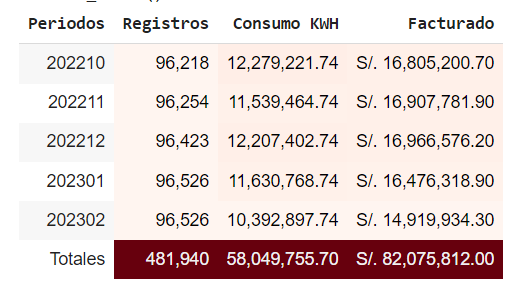

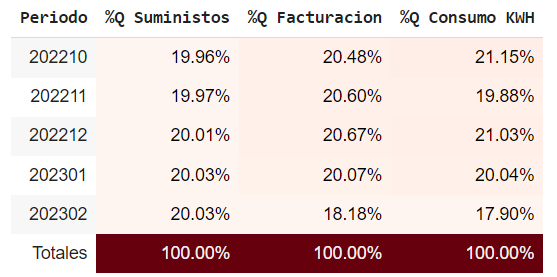

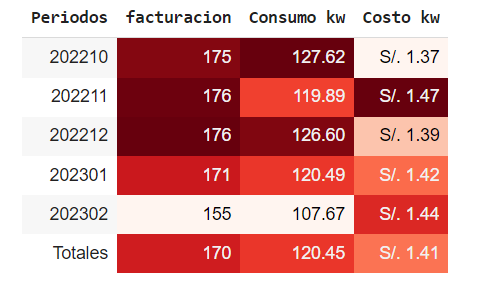




Podemos identificar que en octubre del 2022, se registro el mas alto consumo en Kw,con 127.62 kw, lo cual refleja en color mas intenso, pero el costo por Kw, mas alto se se regsitro el noviembre, con 1.47 soles por cada Kw consumido por Hora, esto debido seguramente a diferenciacion en el cosumo por los distintos tipos de suministros.

# Ahora vamos a revisar las metricas, pesos y KPI's tomando como referencia la columna fecha de alta del suministro

revsiamos en nuestro dataset

In [ ]:
df_ucayali.columns

Index(['CONSUMO_KWh', 'DEPARTAMENTO', 'DISTRITO', 'FACTURACION', 'FECHA_ALTA',
       'FECHA_CORTE', 'PERIODO', 'PROVINCIA', 'STATUS_CLIENTE', 'TARIFA',
       'TITULAR', 'UBIGEO'],
      dtype='object')

Realizamos un conteo de cada dato en la mencionada columna

In [ ]:
[df_ucayali['FECHA_ALTA'].value_counts()]

[20170301    7610
 20020301    4602
 20150113    4309
 20140212    4289
 20011001    4023
             ... 
 20230104       2
 20230117       2
 19920609       1
 20230201       1
 20190922       1
 Name: FECHA_ALTA, Length: 8615, dtype: int64]

identificamos que el campo  'FECHA_ALTA' se compone en año-mes-dia, ejemplo 20170301, el año 2017, mes 03 y el dia 01.

lo separaremos en nuevas columnas years, mes y dia, concatenandoles en nuestro dataframe

In [ ]:
df_ucayali['years']= df_ucayali['FECHA_ALTA']//10000  # usando el operador // obetenemos el año de cada colunma y los almacenamos en la columna 'years'
df_ucayali

,CONSUMO_KWh,DEPARTAMENTO,DISTRITO,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,PROVINCIA,STATUS_CLIENTE,TARIFA,TITULAR,UBIGEO,years
0,130.0,UCAYALI,CALLERIA,110.7,20080222,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10001,250101,2008
1,17.0,UCAYALI,CALLERIA,31.2,20040206,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10002,250101,2004
2,20.0,UCAYALI,IRAZOLA,118.3,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10003,250302,2013
3,23.0,UCAYALI,ALEXANDER VON HUMBOLT,21.7,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10004,250305,2013
4,23.0,UCAYALI,IRAZOLA,41.5,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10005,250302,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,5.0,UCAYALI,CAMPOVERDE,2.2,20140814,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106515,250102,2014
481936,2.0,UCAYALI,CAMPOVERDE,0.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106516,250102,2014
481937,9.0,UCAYALI,CAMPOVERDE,0.0,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106517,250102,2014
481938,62.0,UCAYALI,CAMPOVERDE,192.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106518,250102,2014


In [ ]:
df_ucayali['dias']= df_ucayali['FECHA_ALTA']% 100
df_ucayali

,CONSUMO_KWh,DEPARTAMENTO,DISTRITO,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,PROVINCIA,STATUS_CLIENTE,TARIFA,TITULAR,UBIGEO,years,dias
0,130.0,UCAYALI,CALLERIA,110.7,20080222,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10001,250101,2008,22
1,17.0,UCAYALI,CALLERIA,31.2,20040206,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10002,250101,2004,6
2,20.0,UCAYALI,IRAZOLA,118.3,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10003,250302,2013,22
3,23.0,UCAYALI,ALEXANDER VON HUMBOLT,21.7,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10004,250305,2013,22
4,23.0,UCAYALI,IRAZOLA,41.5,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10005,250302,2013,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,5.0,UCAYALI,CAMPOVERDE,2.2,20140814,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106515,250102,2014,14
481936,2.0,UCAYALI,CAMPOVERDE,0.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106516,250102,2014,15
481937,9.0,UCAYALI,CAMPOVERDE,0.0,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106517,250102,2014,15
481938,62.0,UCAYALI,CAMPOVERDE,192.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106518,250102,2014,15


In [ ]:
df_ucayali['mes']= df_ucayali['FECHA_ALTA']// 100
df_ucayali

,CONSUMO_KWh,DEPARTAMENTO,DISTRITO,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,PROVINCIA,STATUS_CLIENTE,TARIFA,TITULAR,UBIGEO,years,dias,mes
0,130.0,UCAYALI,CALLERIA,110.7,20080222,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10001,250101,2008,22,200802
1,17.0,UCAYALI,CALLERIA,31.2,20040206,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10002,250101,2004,6,200402
2,20.0,UCAYALI,IRAZOLA,118.3,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10003,250302,2013,22,201305
3,23.0,UCAYALI,ALEXANDER VON HUMBOLT,21.7,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10004,250305,2013,22,201305
4,23.0,UCAYALI,IRAZOLA,41.5,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10005,250302,2013,22,201305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,5.0,UCAYALI,CAMPOVERDE,2.2,20140814,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106515,250102,2014,14,201408
481936,2.0,UCAYALI,CAMPOVERDE,0.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106516,250102,2014,15,201408
481937,9.0,UCAYALI,CAMPOVERDE,0.0,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106517,250102,2014,15,201408
481938,62.0,UCAYALI,CAMPOVERDE,192.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106518,250102,2014,15,201408


In [ ]:
df_ucayali['mes_1']=df_ucayali['mes']%100
df_ucayali

,CONSUMO_KWh,DEPARTAMENTO,DISTRITO,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,PROVINCIA,STATUS_CLIENTE,TARIFA,TITULAR,UBIGEO,years,dias,mes,mes_1
0,130.0,UCAYALI,CALLERIA,110.7,20080222,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10001,250101,2008,22,200802,2
1,17.0,UCAYALI,CALLERIA,31.2,20040206,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10002,250101,2004,6,200402,2
2,20.0,UCAYALI,IRAZOLA,118.3,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10003,250302,2013,22,201305,5
3,23.0,UCAYALI,ALEXANDER VON HUMBOLT,21.7,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10004,250305,2013,22,201305,5
4,23.0,UCAYALI,IRAZOLA,41.5,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10005,250302,2013,22,201305,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,5.0,UCAYALI,CAMPOVERDE,2.2,20140814,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106515,250102,2014,14,201408,8
481936,2.0,UCAYALI,CAMPOVERDE,0.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106516,250102,2014,15,201408,8
481937,9.0,UCAYALI,CAMPOVERDE,0.0,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106517,250102,2014,15,201408,8
481938,62.0,UCAYALI,CAMPOVERDE,192.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106518,250102,2014,15,201408,8


In [ ]:
df_ucayali= df_ucayali.drop(columns =['mes'])
df_ucayali

,CONSUMO_KWh,DEPARTAMENTO,DISTRITO,FACTURACION,FECHA_ALTA,FECHA_CORTE,PERIODO,PROVINCIA,STATUS_CLIENTE,TARIFA,TITULAR,UBIGEO,years,dias,mes_1
0,130.0,UCAYALI,CALLERIA,110.7,20080222,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10001,250101,2008,22,2
1,17.0,UCAYALI,CALLERIA,31.2,20040206,20221209,202211,CORONEL PORTILLO,NORMAL,BT5B,10002,250101,2004,6,2
2,20.0,UCAYALI,IRAZOLA,118.3,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10003,250302,2013,22,5
3,23.0,UCAYALI,ALEXANDER VON HUMBOLT,21.7,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10004,250305,2013,22,5
4,23.0,UCAYALI,IRAZOLA,41.5,20130522,20221209,202211,PADRE ABAD,NORMAL,BT5B,10005,250302,2013,22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,5.0,UCAYALI,CAMPOVERDE,2.2,20140814,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106515,250102,2014,14,8
481936,2.0,UCAYALI,CAMPOVERDE,0.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106516,250102,2014,15,8
481937,9.0,UCAYALI,CAMPOVERDE,0.0,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106517,250102,2014,15,8
481938,62.0,UCAYALI,CAMPOVERDE,192.2,20140815,2023309,202302,CORONEL PORTILLO,NORMAL,BT5B,106518,250102,2014,15,8


despues de separar en años, meses y dias, ordenamos nuestras columnas

In [ ]:
df_ucayali = df_ucayali.reindex(columns = 
 ['TITULAR',
  'UBIGEO', 
  'DEPARTAMENTO',
  'PROVINCIA', 
  'DISTRITO',  
  'FECHA_ALTA',
  'FECHA_CORTE', 
  'PERIODO',  
  'STATUS_CLIENTE', 
  'TARIFA',
  'CONSUMO_KWh', 
  'FACTURACION', 
  'years', 
  'mes_1',
  'dias' ])
df_ucayali

,TITULAR,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_ALTA,FECHA_CORTE,PERIODO,STATUS_CLIENTE,TARIFA,CONSUMO_KWh,FACTURACION,years,mes_1,dias
0,10001,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20080222,20221209,202211,NORMAL,BT5B,130.0,110.7,2008,2,22
1,10002,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20040206,20221209,202211,NORMAL,BT5B,17.0,31.2,2004,2,6
2,10003,250302,UCAYALI,PADRE ABAD,IRAZOLA,20130522,20221209,202211,NORMAL,BT5B,20.0,118.3,2013,5,22
3,10004,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLT,20130522,20221209,202211,NORMAL,BT5B,23.0,21.7,2013,5,22
4,10005,250302,UCAYALI,PADRE ABAD,IRAZOLA,20130522,20221209,202211,NORMAL,BT5B,23.0,41.5,2013,5,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,106515,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140814,2023309,202302,NORMAL,BT5B,5.0,2.2,2014,8,14
481936,106516,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,2.0,0.2,2014,8,15
481937,106517,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,9.0,0.0,2014,8,15
481938,106518,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,62.0,192.2,2014,8,15


Contabilizamos los años en nuestra columna 'years'

In [ ]:
years= [df_ucayali['years'].value_counts()]
years 

[2021    34076
 1998    33635
 2015    29585
 2014    28969
 2017    24420
 2016    24326
 2011    23050
 2012    22901
 2022    22326
 2019    18976
 2010    18212
 2018    16609
 2002    15505
 1996    15206
 2013    13913
 2000    13816
 2001    13385
 2020    13185
 2008    10818
 2004    10729
 2006    10277
 1999     9934
 2007     9819
 2003     9758
 1995     9263
 2009     8687
 2005     8341
 1997     4798
 1994     2453
 1992     1447
 1991     1265
 1993     1075
 1990      620
 2023      549
 1900       10
 1911        2
 Name: years, dtype: int64]

Agrupamos por decadas

In [ ]:
decadas = df_ucayali[df_ucayali.years.between(1990,1999)].value_counts()
decadas

TITULAR  UBIGEO  DEPARTAMENTO  PROVINCIA         DISTRITO     FECHA_ALTA  FECHA_CORTE  PERIODO  STATUS_CLIENTE  TARIFA  CONSUMO_KWh  FACTURACION  years  mes_1  dias  fecha_alta_format
10005    250105  UCAYALI       CORONEL PORTILLO  YARINACOCHA  19990716    2023209      202301   NORMAL          BT5B    320.0        722.2        1999   7      16    1999-07-16           1
77164    250101  UCAYALI       CORONEL PORTILLO  CALLERIA     19950301    2023309      202302   NORMAL          BT5B    127.0        118.7        1995   3      1     1995-03-01           1
77168    250101  UCAYALI       CORONEL PORTILLO  CALLERIA     19990906    20221209     202211   NORMAL          BT5B    64.0         55.0         1999   9      6     1999-09-06           1
77167    250101  UCAYALI       CORONEL PORTILLO  CALLERIA     19990823    20221209     202211   NORMAL          BT5B    255.0        462.7        1999   8      23    1999-08-23           1
                                                            

Agrupamos por Decadas, agrupando condicionalmente en rango de años, de 1990 a 1999, 2000 al 2009, del 2010 al 2019 y del 2020 al 2023

In [ ]:
c1 = df_ucayali[df_ucayali.years.between(1990,1999)]
c1=sum(c1['CONSUMO_KWh'])
c1=round(c1,2)
c2 = df_ucayali[df_ucayali.years.between(2000,2009)]
c2=sum(c2['CONSUMO_KWh'])
c2=round(c2,2)
c3 = df_ucayali[df_ucayali.years.between(2010,2019)]
c3=sum(c3['CONSUMO_KWh'])
c3=round(c3,2)
c4 = df_ucayali[df_ucayali.years.between(2020,2023)]
c4=sum(c4['CONSUMO_KWh'])
c4=round(c4,2)
total_consumo_decadas = c1+c2+c3+c4
consumo_decadas = [c1,c2,c3,c4,total_consumo_decadas]

d1 = df_ucayali[df_ucayali.years.between(1990,1999)]
d1=sum(d1['FACTURACION'])
d1=round(d1,2)
d2 = df_ucayali[df_ucayali.years.between(2000,2009)]
d2=sum(d2['FACTURACION'])
d2=round(d2,2)
d3 = df_ucayali[df_ucayali.years.between(2010,2019)]
d3=sum(d3['FACTURACION'])
d3=round(d3,2)
d4 = df_ucayali[df_ucayali.years.between(2020,2023)]
d4=sum(d4['FACTURACION'])
d4=round(d4,2)
total_factu_decadas = d1+d2+d3+d4
factura_decadas = [d1,d2,d3,d4,total_factu_decadas]

a1 = df_ucayali[df_ucayali.years.between(1990,1999)]
a1=len(a1['CONSUMO_KWh'])
a2 = df_ucayali[df_ucayali.years.between(2000,2009)]
a2=len(a2['CONSUMO_KWh'])
a3 = df_ucayali[df_ucayali.years.between(2010,2019)]
a3=len(a3['CONSUMO_KWh'])
a4 = df_ucayali[df_ucayali.years.between(2020,2023)]
a4=len(a4['CONSUMO_KWh'])

total_suministro = a1+a2+a3+a4
suministros = [a1,a2,a3,a4,total_suministro]

decadas = ["90's","2000's","2010's","2020's","Totales"]

con nuestras manipulaciones agrupamos, sumamos y contamos, segun lo que necesitamos, almacendando en Listas para poder realizar nuestro DataFrame

In [ ]:
# realizamos nuestro data frame decadas
df_decadas = pd.DataFrame()
df_decadas['Decadas'] = decadas
df_decadas['Suministros'] =suministros
df_decadas['Facturado'] =factura_decadas
df_decadas['Consumo Kwh'] =consumo_decadas

cm = sns.light_palette("red", as_cmap=True)
df_decadas.style.format({"Suministros": "{:20,.0f}", 
                        "Facturado": "S/. {:20,.2f}", 
                        "Consumo Kwh": "{:20,.2f}",})\
                 .hide_index()\
                 .background_gradient(cmap=cm)

<ipython-input-73-d30135993ae2>:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Decadas,Suministros,Facturado,Consumo Kwh
90's,"79,696","S/. 19,390,435.50","14,426,077.00"
2000's,"111,135","S/. 21,594,347.10","15,577,558.00"
2010's,"220,961","S/. 33,245,424.00","22,637,844.70"
2020's,"70,136","S/. 7,843,333.10","5,405,424.00"
Totales,"481,928","S/. 82,073,539.70","58,046,903.70"


De nuestro graficó métricas, podemos ver que la década del 2010 es donde más se consumió, más registros de suministros y más facturación ocurrieron, la comparación adecuada debería hacerse con la década anterior, pues la década 2020 aún no termina esta iniciando, la variación en cada década, es muy alta, en el caso de lo facturado entre la década 2000 y 2010, existe una variación del 12 M, esto también en cada columna.


Este análisis nos debe ayudar  a descubrir cuál  fue el motivo, ejemplo, ferias, conciertos, construcción u otra actividad que incremento el consumo y su relación con la facturación realizada en esa década

In [ ]:
import seaborn as sns
df_KPI = pd.DataFrame()
df_KPI['Decadas'] = decadas
df_KPI['Suministros'] = df_decadas['Consumo Kwh']/df_decadas['Suministros']
df_KPI['Facturado'] =df_decadas['Facturado']/df_decadas['Suministros']
df_KPI['Consumo Kwh'] =df_decadas['Facturado']/df_decadas['Consumo Kwh']


cm = sns.light_palette("red", as_cmap=True)
df_KPI.style.format({"Suministros": "{:20,.0f}", 
                        "Facturado": "S/. {:20,.2f}", 
                        "Consumo Kwh": "{:20,.2f}",})\
                 .hide_index()\
                 .background_gradient(cmap=cm)

<ipython-input-74-5c6007939cfb>:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Decadas,Suministros,Facturado,Consumo Kwh
90's,181,S/. 243.31,1.34
2000's,140,S/. 194.31,1.39
2010's,102,S/. 150.46,1.47
2020's,77,S/. 111.83,1.45
Totales,120,S/. 170.30,1.41


In [ ]:
Q_suministro =[(x/481928)*100 for x in suministros]
Q_consumo = [(x/58046903.7)*100 for x in consumo_decadas]
Q_facturacion = [(x/82073539.69)*100 for x in factura_decadas]

df_pesos = pd.DataFrame()
df_pesos['Decadas'] = decadas
df_pesos['Q% Suministros'] = Q_suministro
df_pesos['Q% Facturado'] =Q_consumo
df_pesos['Q% Consumo Kwh'] =Q_facturacion

cm = sns.light_palette("red", as_cmap=True)
df_pesos.style.format({"Q% Suministros": "{:20,.2f}", 
                        "Q% Facturado": "S/. {:20,.2f}", 
                        "Q% Consumo Kwh": "{:20,.2f}",})\
                 .hide_index()\
                 .background_gradient(cmap=cm)

<ipython-input-78-2086adadc4ff>:15: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  .hide_index()\


Decadas,Q% Suministros,Q% Facturado,Q% Consumo Kwh
90's,16.54,S/. 24.85,23.63
2000's,23.06,S/. 26.84,26.31
2010's,45.85,S/. 39.00,40.51
2020's,14.55,S/. 9.31,9.56
Totales,100.00,S/. 100.00,100.00


# Para comprender cada variación o incremento en cada década continuaremos nuestro análisis por años y meses

In [ ]:
# una vez que nuestras columnas estan ordenados, agregamos una nueva columna con la fecha de alta en formato  Ymd usamos lambda, esta operacion demorara un poco porque tenemos casi medio millon de registros
df_ucayali['fecha_alta_format'] = df_ucayali['FECHA_ALTA'].apply(lambda m: pd.to_datetime(str(m), format="%Y%m%d"))

df_ucayali

,TITULAR,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_ALTA,FECHA_CORTE,PERIODO,STATUS_CLIENTE,TARIFA,CONSUMO_KWh,FACTURACION,years,mes_1,dias,fecha_alta_format
0,10001,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20080222,20221209,202211,NORMAL,BT5B,130.0,110.7,2008,2,22,2008-02-22
1,10002,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20040206,20221209,202211,NORMAL,BT5B,17.0,31.2,2004,2,6,2004-02-06
2,10003,250302,UCAYALI,PADRE ABAD,IRAZOLA,20130522,20221209,202211,NORMAL,BT5B,20.0,118.3,2013,5,22,2013-05-22
3,10004,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLT,20130522,20221209,202211,NORMAL,BT5B,23.0,21.7,2013,5,22,2013-05-22
4,10005,250302,UCAYALI,PADRE ABAD,IRAZOLA,20130522,20221209,202211,NORMAL,BT5B,23.0,41.5,2013,5,22,2013-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,106515,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140814,2023309,202302,NORMAL,BT5B,5.0,2.2,2014,8,14,2014-08-14
481936,106516,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,2.0,0.2,2014,8,15,2014-08-15
481937,106517,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,9.0,0.0,2014,8,15,2014-08-15
481938,106518,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,62.0,192.2,2014,8,15,2014-08-15


In [ ]:
# guardamos nuestro DataFrame en nuestro drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/datasets python/df_ucayali_fechas.csv'

df_ucayali.to_csv(path, index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_ucayali_fechas = pd.read_csv('/content/drive/MyDrive/datasets python/df_ucayali_fechas.csv')
df_ucayali_fechas

,TITULAR,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_ALTA,FECHA_CORTE,PERIODO,STATUS_CLIENTE,TARIFA,CONSUMO_KWh,FACTURACION,years,mes_1,dias,fecha_alta_format
0,10001,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20080222,20221209,202211,NORMAL,BT5B,130.0,110.7,2008,2,22,2008-02-22
1,10002,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20040206,20221209,202211,NORMAL,BT5B,17.0,31.2,2004,2,6,2004-02-06
2,10003,250302,UCAYALI,PADRE ABAD,IRAZOLA,20130522,20221209,202211,NORMAL,BT5B,20.0,118.3,2013,5,22,2013-05-22
3,10004,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLT,20130522,20221209,202211,NORMAL,BT5B,23.0,21.7,2013,5,22,2013-05-22
4,10005,250302,UCAYALI,PADRE ABAD,IRAZOLA,20130522,20221209,202211,NORMAL,BT5B,23.0,41.5,2013,5,22,2013-05-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,106515,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140814,2023309,202302,NORMAL,BT5B,5.0,2.2,2014,8,14,2014-08-14
481936,106516,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,2.0,0.2,2014,8,15,2014-08-15
481937,106517,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,9.0,0.0,2014,8,15,2014-08-15
481938,106518,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,62.0,192.2,2014,8,15,2014-08-15


Revisamos nuestra data en una tabla pivot, donde las filas seran los años y las columnas seran los meses, identificamos en color azul mas fuerte, aquellos meses que ocuerreiron mas altas

In [ ]:
df_años = pd.DataFrame()

df_años = df_ucayali_fechas.pivot_table(df_ucayali_fechas,
               index=['years'],
               columns=['mes_1'],
               aggfunc=['size']
              )

cm = sns.light_palette("blue", as_cmap=True)
#df_años.style.text_gradient(axis=0)
df_años.style.background_gradient(cmap=cm)

In [ ]:
# consumo decada 90 por años y meses
df_sum_consumo = df_ucayali_fechas.groupby(['years','mes_1'])['CONSUMO_KWh'].sum().reset_index().sort_values('years')
df_sum_consumo= df_sum_consumo.drop([0, 1],axis=0)#.reset_index()
df_sum_consumo

,years,mes_1,CONSUMO_KWh
2,1990,1,95535.0
3,1990,2,2340.0
4,1990,3,951.0
5,1990,5,1822.0
6,1990,6,299.0
...,...,...,...
369,2022,2,120149.0
368,2022,1,343250.0
373,2022,6,87744.0
380,2023,1,71475.0


In [ ]:
 # consumo decada 90 por años y meses

df_sum_consumo.pivot_table(df_sum_consumo,
               index=['years'],
               columns=['mes_1'],
               aggfunc=['sum']
              ).head(10).style.background_gradient(cmap='Blues')

In [ ]:
 # consumo decada 2000 por años y meses
df_sum_consumo.pivot_table(df_sum_consumo,
               index=['years'],
               columns=['mes_1'],
               aggfunc=['sum']
              ).loc[2000:2009].style.background_gradient(cmap='Reds')

In [ ]:
 # consumo decada 2010 por años y meses
df_sum_consumo.pivot_table(df_sum_consumo,
               index=['years'],
               columns=['mes_1'],
               aggfunc=['sum']
              ).loc[2000:2009].style.background_gradient(cmap='Reds')

In [ ]:
  # consumo decada 2010 por años y meses
df_sum_consumo.pivot_table(df_sum_consumo,
               index=['years'],
               columns=['mes_1'],
               aggfunc=['sum']
              ).loc[2010:2019].style.background_gradient(cmap='Oranges')

In [ ]:
 # consumo decada 2020 por años y meses
df_sum_consumo.pivot_table(df_sum_consumo,
               index=['years'],
               columns=['mes_1'],
               aggfunc=['sum']
              ).loc[2020:2023].style.background_gradient(cmap='Oranges')

In [ ]:
df_years_fac_cons = df_ucayali_fechas.groupby(['years'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('years')
df_years_fac_cons

In [ ]:
df_sum_sumni = df_ucayali_fechas.groupby(['years'])['TITULAR'].count().reset_index().sort_values('years')
df_sum_sumni

In [ ]:
df_years_fac_cons_sum = df_sum_sumni.merge(df_years_fac_cons,left_index=True, right_index=True)
df_years_fac_cons_sum

In [ ]:
df_years_fac_cons_sum=df_years_fac_cons_sum.drop(['years_y'], axis=1)
df_years_fac_cons_sum =df_years_fac_cons_sum.drop([0, 1],axis=0)
df_years_fac_cons_sum

In [ ]:
years= df_years_fac_cons_sum['years_x'].tolist()
years

In [ ]:
df_KPI_years = pd.DataFrame()
df_KPI_years['Years']= years #df_years_fac_cons_sum['years_x']
df_KPI_years['Suministros']= df_years_fac_cons_sum['CONSUMO_KWh']/df_years_fac_cons_sum['TITULAR']
df_KPI_years['Facturado']= df_years_fac_cons_sum['FACTURACION']/df_years_fac_cons_sum['TITULAR']
df_KPI_years['Consumo']= df_years_fac_cons_sum['FACTURACION']/df_years_fac_cons_sum['CONSUMO_KWh']

#df_KPI_years.style.background_gradient(cmap='Reds')
#df_KPI_years =df_KPI_years.drop([0, 1],axis=0)

cm = sns.light_palette("orange", as_cmap=True)
df_KPI_years.style.background_gradient(cmap=cm)

# Promedios por años

,Years,Suministros,Facturado,Consumo
0,1990,nan,nan,nan
1,1991,nan,nan,nan
2,1992,177.814516,231.545645,1.302175
3,1993,185.176285,249.637628,1.348108
4,1994,214.136144,280.322806,1.309087
5,1995,182.858605,225.750977,1.234566
6,1996,169.250306,227.165145,1.342185
7,1997,164.867322,222.175807,1.347604
8,1998,166.749770,224.444009,1.345993
9,1999,181.115256,248.216736,1.370490


In [ ]:
#agregamos las filas sumando cada columna
df_years_fac_cons_sum1 = df_years_fac_cons_sum.append(
                        pd.Series(['Totales', 
                                   sum(df_years_fac_cons_sum['TITULAR']),
                                   sum(df_years_fac_cons_sum['FACTURACION']),
                                   sum(df_years_fac_cons_sum['CONSUMO_KWh']),],
                                   index=['years_x','TITULAR','FACTURACION','CONSUMO_KWh']), ignore_index=True)

df_years_fac_cons_sum1

<ipython-input-101-2cfd478d056f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_years_fac_cons_sum1 = df_years_fac_cons_sum.append(


,years_x,TITULAR,FACTURACION,CONSUMO_KWh
0,1990,620,143558.3,110245.0
1,1991,1265,315791.6,234248.0
2,1992,1447,405627.1,309855.0
3,1993,1075,242682.3,196573.0
4,1994,2453,557236.1,415171.0
5,1995,9263,2058014.5,1527166.0
6,1996,15206,3412895.6,2535597.0
7,1997,4798,1190943.9,868991.0
8,1998,33635,8751646.5,6569530.0
9,1999,9934,2312039.6,1658701.0


In [ ]:
df_years_pesos = pd.DataFrame()
df_years_pesos['Years']= df_years_fac_cons_sum1['years_x']
df_years_pesos['% Suministros']= [(x/481928)*100 for x in df_years_fac_cons_sum1['TITULAR']]
df_years_pesos['% Facturacion']= [(x/82073539.69)*100 for x in df_years_fac_cons_sum1['FACTURACION']]
df_years_pesos['% Comsumo Kwh']= [(x/58046903.7)*100 for x in df_years_fac_cons_sum1['CONSUMO_KWh']]
cm = sns.light_palette("red", as_cmap=True)
df_years_pesos.style.background_gradient(cmap = cm)

,Years,% Suministros,% Facturacion,% Comsumo Kwh
0,1990,0.128650,0.174914,0.189924
1,1991,0.262487,0.384767,0.403550
2,1992,0.300252,0.494224,0.533801
3,1993,0.223062,0.295689,0.338645
4,1994,0.508997,0.678947,0.715234
5,1995,1.922071,2.507525,2.630917
6,1996,3.155243,4.158339,4.368186
7,1997,0.995584,1.451069,1.497050
8,1998,6.979258,10.663177,11.317623
9,1999,2.061304,2.817034,2.857518


# Analizamos el status de los suministrados

In [ ]:
df_ucayali_fechas.columns

Index(['TITULAR', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'FECHA_ALTA', 'FECHA_CORTE', 'PERIODO', 'STATUS_CLIENTE', 'TARIFA',
       'CONSUMO_KWh', 'FACTURACION', 'years', 'mes_1', 'dias',
       'fecha_alta_format'],
      dtype='object')

In [ ]:
df_sumi_status = df_ucayali_fechas['STATUS_CLIENTE'].value_counts()
df_sumi_status

NORMAL                 481937
ANULADO A SOLICITUD         3
Name: STATUS_CLIENTE, dtype: int64

In [ ]:
df_sumi_status = df_ucayali_fechas.groupby(['STATUS_CLIENTE'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('STATUS_CLIENTE')
df_sumi_status

<ipython-input-105-165f2e383c5f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sumi_status = df_ucayali_fechas.groupby(['STATUS_CLIENTE'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('STATUS_CLIENTE')


,STATUS_CLIENTE,FACTURACION,CONSUMO_KWh
0,ANULADO A SOLICITUD,80.3,79.0
1,NORMAL,82075731.7,58049676.7


In [ ]:
df_sum_sumni = df_ucayali_fechas.groupby(['STATUS_CLIENTE'])['TITULAR'].count().reset_index().sort_values('STATUS_CLIENTE')
df_sum_sumni

,STATUS_CLIENTE,TITULAR
0,ANULADO A SOLICITUD,3
1,NORMAL,481937


In [ ]:
df_status_sum_fact_cons = df_sum_sumni.merge(df_sumi_status ,left_index=True, right_index=True)
df_status_sum_fact_cons

,STATUS_CLIENTE_x,TITULAR,STATUS_CLIENTE_y,FACTURACION,CONSUMO_KWh
0,ANULADO A SOLICITUD,3,ANULADO A SOLICITUD,80.3,79.0
1,NORMAL,481937,NORMAL,82075731.7,58049676.7


In [ ]:
df_status_sum_fact_cons=df_status_sum_fact_cons.drop(['STATUS_CLIENTE_y'], axis=1)
df_status_sum_fact_cons

,STATUS_CLIENTE_x,TITULAR,FACTURACION,CONSUMO_KWh
0,ANULADO A SOLICITUD,3,80.3,79.0
1,NORMAL,481937,82075731.7,58049676.7


In [ ]:
df_status_SFC_KPI = pd.DataFrame()
df_status_SFC_KPI['Status Cliente']= df_status_sum_fact_cons['STATUS_CLIENTE_x']
df_status_SFC_KPI['Suministro']= df_status_sum_fact_cons['CONSUMO_KWh']/df_status_sum_fact_cons['TITULAR']
df_status_SFC_KPI['Facturacion']= df_status_sum_fact_cons['FACTURACION']/df_status_sum_fact_cons['TITULAR']
df_status_SFC_KPI['Consumo Kwh']= df_status_sum_fact_cons['CONSUMO_KWh']/df_status_sum_fact_cons['CONSUMO_KWh']
df_status_SFC_KPI

,Status Cliente,Suministro,Facturacion,Consumo Kwh
0,ANULADO A SOLICITUD,26.333333,26.766667,1.0
1,NORMAL,120.450757,170.303861,1.0


In [ ]:
df_status_SFC_Pesos = pd.DataFrame()
df_status_SFC_Pesos['% Status Cliente']= df_status_sum_fact_cons['STATUS_CLIENTE_x']
df_status_SFC_Pesos['% Suministro']= [(x/481928)*100 for x in df_status_sum_fact_cons['TITULAR']]
df_status_SFC_Pesos['% Facturacion']= [(x/82073539.69)*100 for x in df_status_sum_fact_cons['FACTURACION']]
df_status_SFC_Pesos['% Consumo Kwh']= [(x/58046903.7)*100 for x in df_status_sum_fact_cons['CONSUMO_KWh']]
df_status_SFC_Pesos

,% Status Cliente,% Suministro,% Facturacion,% Consumo Kwh
0,ANULADO A SOLICITUD,0.000622,0.000098,0.000136
1,NORMAL,100.001867,100.002671,100.004777


## TARIFA

In [ ]:
df_ucayali_fechas.columns

Index(['TITULAR', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'FECHA_ALTA', 'FECHA_CORTE', 'PERIODO', 'STATUS_CLIENTE', 'TARIFA',
       'CONSUMO_KWh', 'FACTURACION', 'years', 'mes_1', 'dias',
       'fecha_alta_format'],
      dtype='object')

In [ ]:
df_sumi_tarifas = df_ucayali_fechas['TARIFA'].value_counts()
df_sumi_tarifas

BT5B    478320
BT8       3450
BT5D       170
Name: TARIFA, dtype: int64

In [ ]:
df_sumi_tarifas = df_ucayali_fechas.groupby(['TARIFA'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('TARIFA')
df_sumi_tarifas

<ipython-input-113-bb5063467373>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sumi_tarifas = df_ucayali_fechas.groupby(['TARIFA'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('TARIFA')


,TARIFA,FACTURACION,CONSUMO_KWh
0,BT5B,80264887.5,57071433.0
1,BT5D,1174193.5,946009.0
2,BT8,636731.0,32313.7


In [ ]:
df_sumi_tarifas1 = df_ucayali_fechas.groupby(['TARIFA'])['TITULAR'].count().reset_index().sort_values('TARIFA')
df_sumi_tarifas1

,TARIFA,TITULAR
0,BT5B,478320
1,BT5D,170
2,BT8,3450


In [ ]:
df_sumi_tarifas1 = df_sumi_tarifas1.merge(df_sumi_tarifas ,left_index=True, right_index=True)
df_sumi_tarifas1

,TARIFA_x,TITULAR,TARIFA_y,FACTURACION,CONSUMO_KWh
0,BT5B,478320,BT5B,80264887.5,57071433.0
1,BT5D,170,BT5D,1174193.5,946009.0
2,BT8,3450,BT8,636731.0,32313.7


In [ ]:
df_sumi_tarifas1=df_sumi_tarifas1.drop(['TARIFA_y'], axis=1)

In [ ]:
df_sumi_tarifas1

,TARIFA_x,TITULAR,FACTURACION,CONSUMO_KWh
0,BT5B,478320,80264887.5,57071433.0
1,BT5D,170,1174193.5,946009.0
2,BT8,3450,636731.0,32313.7


In [ ]:
df_sumi_tarifas1 = df_sumi_tarifas1.append(
    pd.Series([
        'Totales', 
        sum(df_sumi_tarifas1['TITULAR']),
        sum(df_sumi_tarifas1['FACTURACION']),
        sum(df_sumi_tarifas1['CONSUMO_KWh'])],
        index=['TARIFA_x','TITULAR','FACTURACION','CONSUMO_KWh']), ignore_index= True
    
)

df_sumi_tarifas1


<ipython-input-118-136bc04ea449>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sumi_tarifas1 = df_sumi_tarifas1.append(


,TARIFA_x,TITULAR,FACTURACION,CONSUMO_KWh
0,BT5B,478320,80264887.5,57071433.0
1,BT5D,170,1174193.5,946009.0
2,BT8,3450,636731.0,32313.7
3,Totales,481940,82075812.0,58049755.7


In [ ]:
df_tarifas_Q = pd.DataFrame()
df_tarifas_Q['Tarifa']= df_sumi_tarifas1['TARIFA_x']
df_tarifas_Q['Q Suministro']= df_sumi_tarifas1['TITULAR']
df_tarifas_Q['Q Facturacion']= df_sumi_tarifas1['FACTURACION']
df_tarifas_Q['Q Consumo Kw']= df_sumi_tarifas1['CONSUMO_KWh']
df_tarifas_Q

,Tarifa,Q Suministro,Q Facturacion,Q Consumo Kw
0,BT5B,478320,80264887.5,57071433.0
1,BT5D,170,1174193.5,946009.0
2,BT8,3450,636731.0,32313.7
3,Totales,481940,82075812.0,58049755.7


In [ ]:
import seaborn as sns
df_tarifas_kpi = pd.DataFrame()
df_tarifas_kpi['Tarifa']= df_sumi_tarifas1['TARIFA_x']
df_tarifas_kpi['Suministro']= df_sumi_tarifas1['CONSUMO_KWh']/df_sumi_tarifas1['TITULAR']
df_tarifas_kpi['Facturacion']= df_sumi_tarifas1['FACTURACION']/df_sumi_tarifas1['TITULAR']
df_tarifas_kpi['Costo Kw']= df_sumi_tarifas1['FACTURACION']/df_sumi_tarifas1['CONSUMO_KWh']

cm = sns.light_palette("orange", as_cmap=True)
df_tarifas_kpi.style.background_gradient(cmap=cm)

,Tarifa,Suministro,Facturacion,Costo Kw
0,BT5B,119.316426,167.805836,1.406393
1,BT5D,5564.758824,6907.020588,1.241208
2,BT8,9.366290,184.559710,19.704676
3,Totales,120.450172,170.302967,1.413887


In [ ]:

df_tarifas_pesos = pd.DataFrame()
df_tarifas_pesos['Tarifa']= df_sumi_tarifas1['TARIFA_x']
df_tarifas_pesos['% Suministro']= [(x/481928)*100 for x in df_sumi_tarifas1['TITULAR']]
df_tarifas_pesos['% Facturacion']= [(x/82073539.69)*100 for x in df_sumi_tarifas1['FACTURACION']]
df_tarifas_pesos['% Consumo Kw']= [(x/58046903.7)*100 for x in df_sumi_tarifas1['CONSUMO_KWh']] 

cm = sns.light_palette("orange", as_cmap=True)
df_tarifas_pesos.style.background_gradient(cmap=cm)

,Tarifa,% Suministro,% Facturacion,% Consumo Kw
0,BT5B,99.251340,97.796303,98.319513
1,BT5D,0.035275,1.430660,1.629732
2,BT8,0.715875,0.775805,0.055668
3,Totales,100.002490,100.002769,100.004913


# Ahora analizamos las metricas geograficamente

   #  Departamentos

In [ ]:
df_ucayali_fechas.columns

Index(['TITULAR', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'FECHA_ALTA', 'FECHA_CORTE', 'PERIODO', 'STATUS_CLIENTE', 'TARIFA',
       'CONSUMO_KWh', 'FACTURACION', 'years', 'mes_1', 'dias',
       'fecha_alta_format'],
      dtype='object')

In [ ]:
df_sumi_departamento = df_ucayali_fechas.groupby(['DEPARTAMENTO'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('DEPARTAMENTO')
df_sumi_departamento

<ipython-input-123-fd2349e3d8d0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sumi_departamento = df_ucayali_fechas.groupby(['DEPARTAMENTO'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('DEPARTAMENTO')


,DEPARTAMENTO,FACTURACION,CONSUMO_KWh
0,HUANUCO,88600.4,79568.0
1,UCAYALI,81987211.6,57970187.7


In [ ]:
df_sumi_departamento1 = df_ucayali_fechas.groupby(['DEPARTAMENTO'])['TITULAR'].count().reset_index().sort_values('DEPARTAMENTO')
df_sumi_departamento1

,DEPARTAMENTO,TITULAR
0,HUANUCO,886
1,UCAYALI,481054


In [ ]:
df_sumi_departamento = df_sumi_departamento1.merge(df_sumi_departamento ,left_index=True, right_index=True)
df_sumi_departamento

,DEPARTAMENTO_x,TITULAR,DEPARTAMENTO_y,FACTURACION,CONSUMO_KWh
0,HUANUCO,886,HUANUCO,88600.4,79568.0
1,UCAYALI,481054,UCAYALI,81987211.6,57970187.7


In [ ]:
df_sumi_departamento = df_sumi_departamento.drop('DEPARTAMENTO_y', axis= True)
df_sumi_departamento

,DEPARTAMENTO_x,TITULAR,FACTURACION,CONSUMO_KWh
0,HUANUCO,886,88600.4,79568.0
1,UCAYALI,481054,81987211.6,57970187.7


In [ ]:
df_sumi_departamento_metrica = df_sumi_departamento.append(
    pd.Series([
        'Totales', 
        sum(df_sumi_departamento['TITULAR']),
        sum(df_sumi_departamento['FACTURACION']),
        sum(df_sumi_departamento['CONSUMO_KWh'])],
        index=['DEPARTAMENTO_x','TITULAR','FACTURACION','CONSUMO_KWh']), ignore_index= True
    
)

df_sumi_departamento_metrica


<ipython-input-127-af7f907f96cc>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sumi_departamento_metrica = df_sumi_departamento.append(


,DEPARTAMENTO_x,TITULAR,FACTURACION,CONSUMO_KWh
0,HUANUCO,886,88600.4,79568.0
1,UCAYALI,481054,81987211.6,57970187.7
2,Totales,481940,82075812.0,58049755.7


In [ ]:
df_sumi_departamento_Q = pd.DataFrame()
df_sumi_departamento_Q['Departamento']= df_sumi_departamento_metrica['DEPARTAMENTO_x']
df_sumi_departamento_Q['Q Suministro']= df_sumi_departamento_metrica['TITULAR']
df_sumi_departamento_Q['Q Facturacion']= df_sumi_departamento_metrica['FACTURACION']
df_sumi_departamento_Q['Q Consumo Kw']= df_sumi_departamento_metrica['CONSUMO_KWh']
df_sumi_departamento_Q

,Departamento,Q Suministro,Q Facturacion,Q Consumo Kw
0,HUANUCO,886,88600.4,79568.0
1,UCAYALI,481054,81987211.6,57970187.7
2,Totales,481940,82075812.0,58049755.7


In [ ]:
import seaborn as sns
df_departamento_kpi = pd.DataFrame()
df_departamento_kpi['Departamento']= df_sumi_departamento_metrica['DEPARTAMENTO_x']
df_departamento_kpi['Suministro']= df_sumi_departamento_metrica['CONSUMO_KWh']/df_sumi_departamento_metrica['TITULAR']
df_departamento_kpi['Facturacion']= df_sumi_departamento_metrica['FACTURACION']/df_sumi_departamento_metrica['TITULAR']
df_departamento_kpi['Costo Kw']= df_sumi_departamento_metrica['FACTURACION']/df_sumi_departamento_metrica['CONSUMO_KWh']

df_departamento_kpi

,Departamento,Suministro,Facturacion,Costo Kw
0,HUANUCO,89.805869,100.000451,1.113518
1,UCAYALI,120.506612,170.432450,1.414300
2,Totales,120.450172,170.302967,1.413887


In [ ]:
df_departamento_pesos = pd.DataFrame()
df_departamento_pesos['Tarifa']= df_sumi_departamento_metrica['DEPARTAMENTO_x']
df_departamento_pesos['% Suministro']= [(x/481928)*100 for x in df_sumi_departamento_metrica['TITULAR']]
df_departamento_pesos['% Facturacion']= [(x/82073539.69)*100 for x in df_sumi_departamento_metrica['FACTURACION']]
df_departamento_pesos['% Consumo Kw']= [(x/58046903.7)*100 for x in df_sumi_departamento_metrica['CONSUMO_KWh']] 
df_departamento_pesos

,Tarifa,% Suministro,% Facturacion,% Consumo Kw
0,HUANUCO,0.183845,0.107952,0.137075
1,UCAYALI,99.818645,99.894816,99.867838
2,Totales,100.002490,100.002769,100.004913


  #   Provincias

In [ ]:
df_ucayali_fechas.columns

Index(['TITULAR', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'FECHA_ALTA', 'FECHA_CORTE', 'PERIODO', 'STATUS_CLIENTE', 'TARIFA',
       'CONSUMO_KWh', 'FACTURACION', 'years', 'mes_1', 'dias',
       'fecha_alta_format'],
      dtype='object')

In [ ]:
df_sumi_provincia = df_ucayali_fechas.groupby(['PROVINCIA'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('PROVINCIA')
df_sumi_provincia1 = df_ucayali_fechas.groupby(['PROVINCIA'])['TITULAR'].count().reset_index().sort_values('PROVINCIA')

df_sumi_provincia = df_sumi_provincia1.merge(df_sumi_provincia ,left_index=True, right_index=True)
df_sumi_provincia

<ipython-input-132-bf8ac08197be>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sumi_provincia = df_ucayali_fechas.groupby(['PROVINCIA'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('PROVINCIA')


,PROVINCIA_x,TITULAR,PROVINCIA_y,FACTURACION,CONSUMO_KWh
0,ATALAYA,13565,ATALAYA,2943712.7,2148389.0
1,CORONEL PORTILLO,387479,CORONEL PORTILLO,71473516.1,50771006.0
2,PADRE ABAD,74802,PADRE ABAD,6798286.2,4889645.0
3,PUERTO INCA,886,PUERTO INCA,88600.4,79568.0
4,PURUS,5208,PURUS,771696.6,161147.7


In [ ]:
df_provincia = df_sumi_provincia.drop('PROVINCIA_y', axis= True)
df_provincia

,PROVINCIA_x,TITULAR,FACTURACION,CONSUMO_KWh
0,ATALAYA,13565,2943712.7,2148389.0
1,CORONEL PORTILLO,387479,71473516.1,50771006.0
2,PADRE ABAD,74802,6798286.2,4889645.0
3,PUERTO INCA,886,88600.4,79568.0
4,PURUS,5208,771696.6,161147.7


In [ ]:
df_provincia_metricas = df_provincia.append(
    pd.Series([
        'Totales', 
        sum(df_provincia['TITULAR']),
        sum(df_provincia['FACTURACION']),
        sum(df_provincia['CONSUMO_KWh'])],
        index=['PROVINCIA_x','TITULAR','FACTURACION','CONSUMO_KWh']), ignore_index= True
    
)

df_provincia_metricas

<ipython-input-134-4eed86bc74f1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_provincia_metricas = df_provincia.append(


,PROVINCIA_x,TITULAR,FACTURACION,CONSUMO_KWh
0,ATALAYA,13565,2943712.7,2148389.0
1,CORONEL PORTILLO,387479,71473516.1,50771006.0
2,PADRE ABAD,74802,6798286.2,4889645.0
3,PUERTO INCA,886,88600.4,79568.0
4,PURUS,5208,771696.6,161147.7
5,Totales,481940,82075812.0,58049755.7


In [ ]:
df_provincia_Q = pd.DataFrame()
df_provincia_Q['Provincia']= df_provincia_metricas['PROVINCIA_x']
df_provincia_Q['Q Suministro']= df_provincia_metricas['TITULAR']
df_provincia_Q['Q Facturacion']= df_provincia_metricas['FACTURACION']
df_provincia_Q['Q Consumo Kw']= df_provincia_metricas['CONSUMO_KWh']
df_provincia_Q

,Provincia,Q Suministro,Q Facturacion,Q Consumo Kw
0,ATALAYA,13565,2943712.7,2148389.0
1,CORONEL PORTILLO,387479,71473516.1,50771006.0
2,PADRE ABAD,74802,6798286.2,4889645.0
3,PUERTO INCA,886,88600.4,79568.0
4,PURUS,5208,771696.6,161147.7
5,Totales,481940,82075812.0,58049755.7


In [ ]:

df_provincia_kpi = pd.DataFrame()
df_provincia_kpi['Provincia']= df_provincia_metricas['PROVINCIA_x']
df_provincia_kpi['Suministro']= df_provincia_metricas['CONSUMO_KWh']/df_provincia_metricas['TITULAR']
df_provincia_kpi['Facturacion']= df_provincia_metricas['FACTURACION']/df_provincia_metricas['TITULAR']
df_provincia_kpi['Costo Kw']= df_provincia_metricas['FACTURACION']/df_provincia_metricas['CONSUMO_KWh']
df_provincia_kpi

,Provincia,Suministro,Facturacion,Costo Kw
0,ATALAYA,158.377368,217.007940,1.370195
1,CORONEL PORTILLO,131.029052,184.457780,1.407762
2,PADRE ABAD,65.367838,90.883749,1.390344
3,PUERTO INCA,89.805869,100.000451,1.113518
4,PURUS,30.942339,148.175230,4.788753
5,Totales,120.450172,170.302967,1.413887


In [ ]:
df_provincia_pesos = pd.DataFrame()
df_provincia_pesos['Tarifa']= df_provincia_metricas['PROVINCIA_x']
df_provincia_pesos['% Suministro']= [(x/481928)*100 for x in df_provincia_metricas['TITULAR']]
df_provincia_pesos['% Facturacion']= [(x/82073539.69)*100 for x in df_provincia_metricas['FACTURACION']]
df_provincia_pesos['% Consumo Kw']= [(x/58046903.7)*100 for x in df_provincia_metricas['CONSUMO_KWh']] 
df_provincia_pesos

,Tarifa,% Suministro,% Facturacion,% Consumo Kw
0,ATALAYA,2.814736,3.586677,3.701126
1,CORONEL PORTILLO,80.401844,87.084725,87.465485
2,PADRE ABAD,15.521406,8.283164,8.423610
3,PUERTO INCA,0.183845,0.107952,0.137075
4,PURUS,1.080659,0.940250,0.277616
5,Totales,100.002490,100.002769,100.004913


## Distritos

In [ ]:
df_ucayali_fechas.columns

Index(['TITULAR', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'FECHA_ALTA', 'FECHA_CORTE', 'PERIODO', 'STATUS_CLIENTE', 'TARIFA',
       'CONSUMO_KWh', 'FACTURACION', 'years', 'mes_1', 'dias',
       'fecha_alta_format'],
      dtype='object')

In [ ]:
df_sumi_distritos = df_ucayali_fechas.groupby(['DISTRITO'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('DISTRITO')
df_sumi_distritos1 = df_ucayali_fechas.groupby(['DISTRITO'])['TITULAR'].count().reset_index().sort_values('DISTRITO')
df_sumi_distritos = df_sumi_distritos1.merge(df_sumi_distritos ,left_index=True, right_index=True)
df_sumi_distritos = df_sumi_distritos.drop('DISTRITO_y', axis= True)
df_sumi_distritos = df_sumi_distritos.append(
    pd.Series([
        'Totales', 
        sum(df_sumi_distritos['TITULAR']),
        sum(df_sumi_distritos['FACTURACION']),
        sum(df_sumi_distritos['CONSUMO_KWh'])],
        index=['DISTRITO_x','TITULAR','FACTURACION','CONSUMO_KWh']), ignore_index= True
    
)
df_distritos_Q = pd.DataFrame()
df_distritos_Q['Provincia']= df_sumi_distritos['DISTRITO_x']
df_distritos_Q['Q Suministro']= df_sumi_distritos['TITULAR']
df_distritos_Q['Q Facturacion']= df_sumi_distritos['FACTURACION']
df_distritos_Q['Q Consumo Kw']= df_sumi_distritos['CONSUMO_KWh']

df_distritos_kpi = pd.DataFrame()
df_distritos_kpi['Provincia']= df_sumi_distritos['DISTRITO_x']
df_distritos_kpi['Suministro']= df_sumi_distritos['CONSUMO_KWh']/df_sumi_distritos['TITULAR']
df_distritos_kpi['Facturacion']= df_sumi_distritos['FACTURACION']/df_sumi_distritos['TITULAR']
df_distritos_kpi['Costo Kw']= df_sumi_distritos['FACTURACION']/df_sumi_distritos['CONSUMO_KWh']

df_ditritos_pesos = pd.DataFrame()
df_ditritos_pesos['Tarifa']= df_sumi_distritos['DISTRITO_x']
df_ditritos_pesos['% Suministro']= [(x/481928)*100 for x in df_sumi_distritos['TITULAR']]
df_ditritos_pesos['% Facturacion']= [(x/82073539.69)*100 for x in df_sumi_distritos['FACTURACION']]
df_ditritos_pesos['% Consumo Kw']= [(x/58046903.7)*100 for x in df_sumi_distritos['CONSUMO_KWh']] 



<ipython-input-139-59150e4f7b62>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sumi_distritos = df_ucayali_fechas.groupby(['DISTRITO'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('DISTRITO')
<ipython-input-139-59150e4f7b62>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sumi_distritos = df_sumi_distritos.append(


In [ ]:
df_ditritos_pesos

,Tarifa,% Suministro,% Facturacion,% Consumo Kw
0,ALEXANDER VON HUMBOLT,0.243812,0.142369,0.144897
1,CALLERIA,33.016550,41.024448,41.507923
2,CAMPOVERDE,8.336515,4.828433,5.127137
3,CURIMANA,1.267824,0.507260,0.574019
4,HONORIA,0.117445,0.069912,0.088782
5,IRAZOLA,3.570865,1.864418,1.968317
6,MANANTAY,13.118142,11.863277,11.518094
7,MASISEA,0.144627,0.127341,0.069752
8,NESHUYA,0.724382,0.363872,0.422755
9,NUEVA REQUENA,0.108315,0.052424,0.052230


In [ ]:
df_distritos_kpi

,Provincia,Suministro,Facturacion,Costo Kw
0,ALEXANDER VON HUMBOLT,71.581277,99.444255,1.389250
1,CALLERIA,151.424520,211.607988,1.397449
2,CAMPOVERDE,74.077658,98.637642,1.331544
3,CURIMANA,54.533552,68.138560,1.249480
4,HONORIA,91.051237,101.376502,1.113401
5,IRAZOLA,66.392411,88.918229,1.339283
6,MANANTAY,105.756042,154.011571,1.456291
7,MASISEA,58.090387,149.947633,2.581281
8,NESHUYA,70.293899,85.546491,1.216983
9,NUEVA REQUENA,58.080460,82.426054,1.419170


In [ ]:
df_distritos_Q

,Provincia,Q Suministro,Q Facturacion,Q Consumo Kw
0,ALEXANDER VON HUMBOLT,1175,116847.0,84108.0
1,CALLERIA,159116,33670216.6,24094064.0
2,CAMPOVERDE,40176,3962865.9,2976144.0
3,CURIMANA,6110,416326.6,333200.0
4,HONORIA,566,57379.1,51535.0
5,IRAZOLA,17209,1530193.8,1142547.0
6,MANANTAY,63220,9736611.5,6685897.0
7,MASISEA,697,104513.5,40489.0
8,NESHUYA,3491,298642.8,245396.0
9,NUEVA REQUENA,522,43026.4,30318.0


Realizaremos un analisis en deciles, para revisar promedios y ver su variacion en respecto a cada decil

Utilizaremos para esto los datos de la provincia de coronel portillo, ya que representa la mayoria de lo datos en nuetro data set

In [ ]:
df_cp= df_ucayali_fechas[df_ucayali_fechas['PROVINCIA']  == 'CORONEL PORTILLO']
df_cp

,TITULAR,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_ALTA,FECHA_CORTE,PERIODO,STATUS_CLIENTE,TARIFA,CONSUMO_KWh,FACTURACION,years,mes_1,dias,fecha_alta_format
0,10001,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20080222,20221209,202211,NORMAL,BT5B,130.0,110.7,2008,2,22,2008-02-22
1,10002,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20040206,20221209,202211,NORMAL,BT5B,17.0,31.2,2004,2,6,2004-02-06
7,10008,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,20221209,202211,NORMAL,BT5B,12.0,20.6,2014,8,15,2014-08-15
8,10009,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,20221209,202211,NORMAL,BT5B,127.0,101.0,2014,8,15,2014-08-15
9,10010,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140322,20221209,202211,NORMAL,BT5B,59.0,105.3,2014,3,22,2014-03-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,106515,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140814,2023309,202302,NORMAL,BT5B,5.0,2.2,2014,8,14,2014-08-14
481936,106516,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,2.0,0.2,2014,8,15,2014-08-15
481937,106517,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,9.0,0.0,2014,8,15,2014-08-15
481938,106518,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,62.0,192.2,2014,8,15,2014-08-15


con la funcion qcut  de pandas separamos en 10 partes iguales nuestro data frame

In [ ]:
df_cp['Decile'] = pd.qcut(df_cp['FACTURACION'], 10, labels=False)


<ipython-input-145-3123fe90f246>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cp['Decile'] = pd.qcut(df_cp['FACTURACION'], 10, labels=False)


In [ ]:
df_cp

,TITULAR,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,FECHA_ALTA,FECHA_CORTE,PERIODO,STATUS_CLIENTE,TARIFA,CONSUMO_KWh,FACTURACION,years,mes_1,dias,fecha_alta_format,Decile
0,10001,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20080222,20221209,202211,NORMAL,BT5B,130.0,110.7,2008,2,22,2008-02-22,5
1,10002,250101,UCAYALI,CORONEL PORTILLO,CALLERIA,20040206,20221209,202211,NORMAL,BT5B,17.0,31.2,2004,2,6,2004-02-06,2
7,10008,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,20221209,202211,NORMAL,BT5B,12.0,20.6,2014,8,15,2014-08-15,1
8,10009,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,20221209,202211,NORMAL,BT5B,127.0,101.0,2014,8,15,2014-08-15,5
9,10010,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140322,20221209,202211,NORMAL,BT5B,59.0,105.3,2014,3,22,2014-03-22,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481935,106515,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140814,2023309,202302,NORMAL,BT5B,5.0,2.2,2014,8,14,2014-08-14,0
481936,106516,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,2.0,0.2,2014,8,15,2014-08-15,0
481937,106517,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,9.0,0.0,2014,8,15,2014-08-15,0
481938,106518,250102,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,20140815,2023309,202302,NORMAL,BT5B,62.0,192.2,2014,8,15,2014-08-15,7


Agrupamos de acuerdo a los deciles asignados e iniciamos a ubicar nuestras metricas, KPI y pesos respectivos 

In [ ]:
df_cp1 = df_cp.groupby(['Decile'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('Decile')
df_cp1

<ipython-input-147-8b3f3ecf6034>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cp1 = df_cp.groupby(['Decile'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('Decile')


,Decile,FACTURACION,CONSUMO_KWh
0,0,267306.0,241883.0
1,1,728241.5,695290.0
2,2,1484369.7,1434361.0
3,3,2346290.4,2329618.0
4,4,3307444.4,3152191.0
5,5,4475594.7,3940183.0
6,6,6128050.6,5050716.0
7,7,8287456.5,6466210.0
8,8,12371431.1,8586810.0
9,9,32077331.2,18873744.0


In [ ]:
#df_cp1 = df_cp.groupby(['Decile'])['FACTURACION','CONSUMO_KWh'].sum().reset_index().sort_values('Decile')
df_cp2 = df_cp.groupby(['Decile'])['TITULAR'].count().reset_index().sort_values('Decile')
df_cp2

,Decile,TITULAR
0,0,39325
1,1,38233
2,2,38744
3,3,38743
4,4,38851
5,5,38618
6,6,38757
7,7,38725
8,8,38737
9,9,38746


In [ ]:
df_decile = df_cp2.merge(df_cp1 ,left_index=True, right_index=True)


In [ ]:
df_decile

,Decile_x,TITULAR,Decile_y,FACTURACION,CONSUMO_KWh
0,0,39325,0,267306.0,241883.0
1,1,38233,1,728241.5,695290.0
2,2,38744,2,1484369.7,1434361.0
3,3,38743,3,2346290.4,2329618.0
4,4,38851,4,3307444.4,3152191.0
5,5,38618,5,4475594.7,3940183.0
6,6,38757,6,6128050.6,5050716.0
7,7,38725,7,8287456.5,6466210.0
8,8,38737,8,12371431.1,8586810.0
9,9,38746,9,32077331.2,18873744.0


In [ ]:
#df_cp1 = df_cp1.merge(df_cp2 ,left_index=True, right_index=True)
df_decile = df_decile.drop('Decile_y', axis= True)
df_deciles = df_decile.append(
    pd.Series([
        'Totales', 
        sum(df_decile['TITULAR']),
        sum(df_decile['FACTURACION']),
        sum(df_decile['CONSUMO_KWh'])],
        index=['Decile_x','TITULAR','FACTURACION','CONSUMO_KWh']), ignore_index= True
    
)

<ipython-input-151-fc31cdc37eec>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_deciles = df_decile.append(


In [ ]:
df_deciles

,Decile_x,TITULAR,FACTURACION,CONSUMO_KWh
0,0,39325,267306.0,241883.0
1,1,38233,728241.5,695290.0
2,2,38744,1484369.7,1434361.0
3,3,38743,2346290.4,2329618.0
4,4,38851,3307444.4,3152191.0
5,5,38618,4475594.7,3940183.0
6,6,38757,6128050.6,5050716.0
7,7,38725,8287456.5,6466210.0
8,8,38737,12371431.1,8586810.0
9,9,38746,32077331.2,18873744.0


In [ ]:
df_distritos_Q = pd.DataFrame()
df_distritos_Q['Decil']= df_deciles['Decile_x']
df_distritos_Q['Q Suministro']= df_deciles['TITULAR']
df_distritos_Q['Q Facturacion']= df_deciles['FACTURACION']
df_distritos_Q['Q Consumo Kw']= df_deciles['CONSUMO_KWh']

df_distritos_kpi = pd.DataFrame()
df_distritos_kpi['Decil']= df_deciles['Decile_x']
df_distritos_kpi['Facturacion']= df_deciles['FACTURACION']/df_deciles['TITULAR']
df_distritos_kpi['Consumo Kw']= df_deciles['CONSUMO_KWh']/df_deciles['TITULAR']
df_distritos_kpi['Costo Kw']= df_deciles['FACTURACION']/df_deciles['CONSUMO_KWh']

df_ditritos_pesos = pd.DataFrame()
df_ditritos_pesos['Decil']= df_deciles['Decile_x']
df_ditritos_pesos['% Suministro']= [(x/387479)*100 for x in df_deciles['TITULAR']]
df_ditritos_pesos['% Facturacion']= [(x/71473516.1)*100 for x in df_deciles['FACTURACION']]
df_ditritos_pesos['% Consumo Kw']= [(x/50771006.0)*100 for x in df_deciles['CONSUMO_KWh']] 

In [ ]:
df_distritos_Q

,Decil,Q Suministro,Q Facturacion,Q Consumo Kw
0,0,39325,267306.0,241883.0
1,1,38233,728241.5,695290.0
2,2,38744,1484369.7,1434361.0
3,3,38743,2346290.4,2329618.0
4,4,38851,3307444.4,3152191.0
5,5,38618,4475594.7,3940183.0
6,6,38757,6128050.6,5050716.0
7,7,38725,8287456.5,6466210.0
8,8,38737,12371431.1,8586810.0
9,9,38746,32077331.2,18873744.0


In [ ]:
df_ditritos_pesos

,Decil,% Suministro,% Facturacion,% Consumo Kw
0,0,10.148937,0.373993,0.476420
1,1,9.867115,1.018897,1.369463
2,2,9.998993,2.076811,2.825158
3,3,9.998735,3.282741,4.588481
4,4,10.026608,4.627510,6.208644
5,5,9.966476,6.261892,7.760695
6,6,10.002349,8.573876,9.948032
7,7,9.994090,11.595143,12.736029
8,8,9.997187,17.309112,16.912822
9,9,9.999510,44.880024,37.174257


In [ ]:
df_distritos_kpi

,Decil,Facturacion,Consumo Kw,Costo Kw
0,0,6.797355,6.150871,1.105105
1,1,19.047459,18.185599,1.047392
2,2,38.312247,37.021500,1.034865
3,3,60.560370,60.130036,1.007157
4,4,85.131513,81.135389,1.049253
5,5,115.894005,102.029701,1.135885
6,6,158.114679,130.317517,1.213303
7,7,214.007915,166.977663,1.281656
8,8,319.369882,221.669463,1.440748
9,9,827.887555,487.114644,1.699574


Separamos en un nuevo data frame, las columna que necesitaremos para realizar nuestro grafico de dispercion respecto a los deciles propuestos

In [ ]:
df_gafico_deciles = pd.DataFrame()
df_gafico_deciles['Decil']= df_distritos_kpi['Decil']
df_gafico_deciles['Facturacion']= df_distritos_kpi['Facturacion']
df_gafico_deciles['Costo Kw']= df_distritos_kpi['Consumo Kw']
df_gafico_deciles['% Suministro']= df_ditritos_pesos['% Suministro']
df_gafico_deciles

,Decil,Facturacion,Costo Kw,% Suministro
0,0,6.797355,6.150871,10.148937
1,1,19.047459,18.185599,9.867115
2,2,38.312247,37.021500,9.998993
3,3,60.560370,60.130036,9.998735
4,4,85.131513,81.135389,10.026608
5,5,115.894005,102.029701,9.966476
6,6,158.114679,130.317517,10.002349
7,7,214.007915,166.977663,9.994090
8,8,319.369882,221.669463,9.997187
9,9,827.887555,487.114644,9.999510


In [ ]:
df_gafico_deciles= df_gafico_deciles.drop([10],axis=0)
df_gafico_deciles

,Decil,Facturacion,Costo Kw,% Suministro
0,0,6.797355,6.150871,10.148937
1,1,19.047459,18.185599,9.867115
2,2,38.312247,37.021500,9.998993
3,3,60.560370,60.130036,9.998735
4,4,85.131513,81.135389,10.026608
5,5,115.894005,102.029701,9.966476
6,6,158.114679,130.317517,10.002349
7,7,214.007915,166.977663,9.994090
8,8,319.369882,221.669463,9.997187
9,9,827.887555,487.114644,9.999510


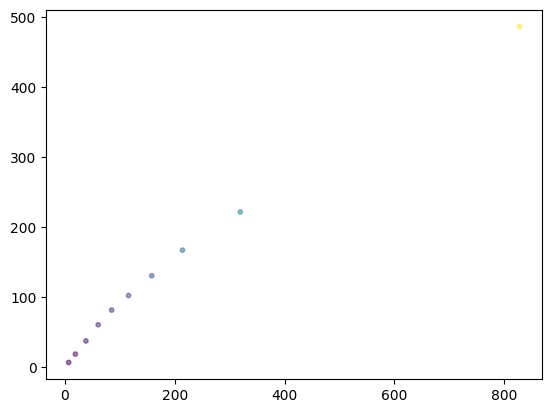

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = df_gafico_deciles['Facturacion']
y = df_gafico_deciles['Costo Kw']
colors = df_gafico_deciles['Costo Kw']
area= df_gafico_deciles['% Suministro']  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5  )
plt.show()

<Axes: xlabel='Facturacion', ylabel='Costo Kw'>

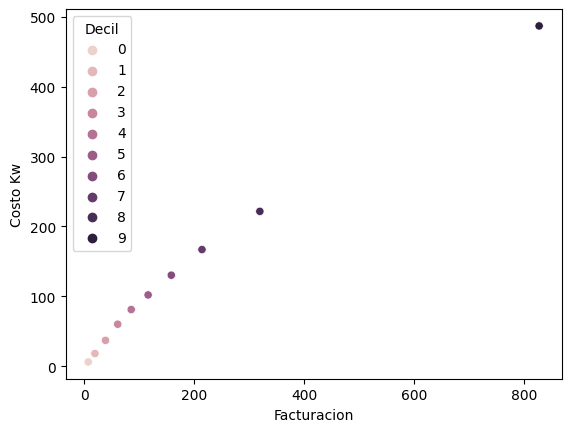

In [ ]:
sns.scatterplot(
    data=df_gafico_deciles, 
    x=df_gafico_deciles['Facturacion'], 
    y=df_gafico_deciles['Costo Kw'],
    hue=df_gafico_deciles['Decil'], 
    #size=df_gafico_deciles['% Suministro'],
    sizes=(10, 10), legend="full"
)

In [ ]:
df_gafico_deciles

,Decil,Facturacion,Costo Kw,% Suministro
0,0,6.797355,6.150871,10.148937
1,1,19.047459,18.185599,9.867115
2,2,38.312247,37.021500,9.998993
3,3,60.560370,60.130036,9.998735
4,4,85.131513,81.135389,10.026608
5,5,115.894005,102.029701,9.966476
6,6,158.114679,130.317517,10.002349
7,7,214.007915,166.977663,9.994090
8,8,319.369882,221.669463,9.997187
9,9,827.887555,487.114644,9.999510


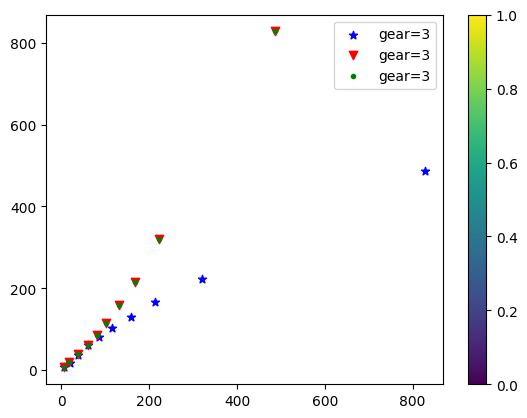

In [ ]:
# PLOT
plt.scatter(df_gafico_deciles['Facturacion'],df_gafico_deciles['Costo Kw'],color='blue', marker= '*', label='gear=3')
plt.scatter(df_gafico_deciles['Costo Kw'],df_gafico_deciles['Facturacion'],color='red', marker= 'v', label='gear=3')
plt.scatter(df_gafico_deciles['Costo Kw'],df_gafico_deciles['Facturacion'],color='green', marker= '.', label='gear=3')
plt.legend()
plt.colorbar()